In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob

In [40]:
points = pd.read_csv("pertresults/2023-Jan24_2156_res.csv",
                    names = ["C","rho","meanFy","varx","vary","varFy"])
points["Fysign"] = np.sign(points["meanFy"])

In [41]:
points

,C,rho,meanFy,varx,vary,varFy,Fysign
0,0.508537,-0.422873,-6.690222e-02,0.004670,2.369780,6.341706e-06,-1.0
1,0.381679,-0.729424,-1.451942e-01,0.011449,1.651993,3.943925e-05,-1.0
2,1.206277,0.830850,0.000000e+00,0.482532,439.710545,0.000000e+00,0.0
3,1.525130,0.653218,2.110889e-05,1.876214,2259.544481,2.390565e-11,1.0
4,1.353982,0.733922,6.289096e-07,2.086604,2236.056729,2.602253e-14,1.0
5,0.519683,-0.436576,-9.166642e-02,0.011825,2.199041,1.380493e-05,-1.0
6,0.450336,-0.491603,-1.233488e-01,0.011842,1.761320,2.890139e-05,-1.0
7,1.542546,0.653105,0.000000e+00,0.184289,366.748191,0.000000e+00,0.0
8,1.381340,0.730204,1.167057e-05,1.017232,2539.083956,6.514677e-12,1.0
9,1.493722,0.675281,2.307019e-07,1.089271,5615.286330,4.322291e-15,1.0


/var/folders/tm/37ds31ds14913tj9402vqksr0000gn/T/ipykernel_7683/932509722.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.linspace(0,3),1/np.linspace(0,3))


(0.0, 3.0)

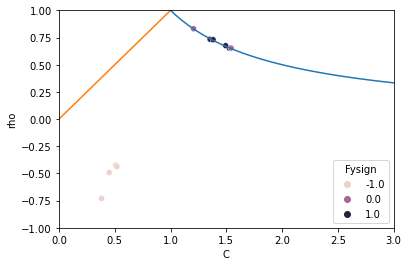

In [42]:
sns.scatterplot(data=points,x="C",y="rho",hue="Fysign")
plt.plot(np.linspace(0,3),1/np.linspace(0,3))
plt.plot(np.linspace(0,3),np.linspace(0,3))
plt.ylim(-1,1)
plt.xlim(0,3)

In [51]:
for i in glob.iglob("pertresults/*.csv"):
    print(i)

pertresults/2023-Jan24_1237_res.csv
pertresults/2023-Jan24_1728_res.csv
pertresults/2023-Jan24_1827_res.csv
pertresults/2023-Jan24_1511_res.csv
pertresults/2023-Jan24_2156_res.csv
pertresults/2023-Jan24_1339_res.csv
pertresults/2023-Jan24_1352_res.csv


In [61]:
allfiles = pd.concat(map(lambda x: pd.read_csv(x,names = ["C","rho","meanFy","varx","vary","varFy"]),glob.glob("pertresults/*.csv")))
allfiles["Fysign"] = np.sign(allfiles["meanFy"])
allfiles["1/C"] = 1/allfiles["C"]

/var/folders/tm/37ds31ds14913tj9402vqksr0000gn/T/ipykernel_7683/28344831.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.linspace(0,3),1/np.linspace(0,3))


(0.0, 3.0)

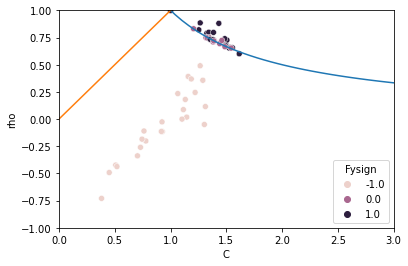

In [62]:
sns.scatterplot(data=allfiles,x="C",y="rho",hue="Fysign")
plt.plot(np.linspace(0,3),1/np.linspace(0,3))
plt.plot(np.linspace(0,3),np.linspace(0,3))
plt.ylim(-1,1)
plt.xlim(0,3)

In [64]:
outlierhunt = allfiles[(allfiles["Fysign"]==0) & (allfiles['rho']>allfiles["1/C"])]

In [65]:
(outlierhunt['rho']-outlierhunt["1/C"])/outlierhunt["1/C"]

2     0.002344
3     0.026407
7     0.009860
12    0.004270
3     0.055544
2     0.002235
7     0.007444
dtype: float64

In [66]:
outlierhunt

,C,rho,meanFy,varx,vary,varFy,Fysign,1/C
2,1.367505,0.732973,0.0,0.566722,1519.385786,0.0,0.0,0.731259
3,1.462563,0.701786,0.0,1.243711,1670.572060,0.0,0.0,0.683731
7,1.346025,0.750254,0.0,0.350762,244.794122,0.0,0.0,0.742928
12,1.391308,0.721817,0.0,1.614685,4434.380081,0.0,0.0,0.718748
3,1.459371,0.723287,0.0,0.008504,0.717752,0.0,0.0,0.685227
2,1.206277,0.830850,0.0,0.482532,439.710545,0.0,0.0,0.828997
7,1.542546,0.653105,0.0,0.184289,366.748191,0.0,0.0,0.648279


In [67]:
allfiles

,C,rho,meanFy,varx,vary,varFy,Fysign,1/C
0,0.926503,-0.114762,-0.305965,0.192277,2.625185,0.000091,-1.0,1.079327
1,1.311990,0.115262,-0.148756,0.205020,5.618092,0.000027,-1.0,0.762201
2,1.487488,0.667248,0.000000,0.578872,20.734548,0.000000,0.0,0.672274
3,1.001393,0.999323,0.035174,179.707782,2870.481127,0.001923,1.0,0.998609
4,1.000000,1.000000,0.001971,19.647260,315.279373,0.000194,1.0,1.000000
...,...,...,...,...,...,...,...,...
0,0.917672,-0.113805,-0.306676,0.228885,3.060739,0.000109,-1.0,1.089714
1,1.185639,0.369069,-0.148432,0.328027,7.429644,0.000037,-1.0,0.843427
2,1.487022,0.666154,0.000000,0.775268,27.364654,0.000000,0.0,0.672485
3,1.432607,0.880465,0.089346,2.922475,95.657659,0.000103,1.0,0.698028
